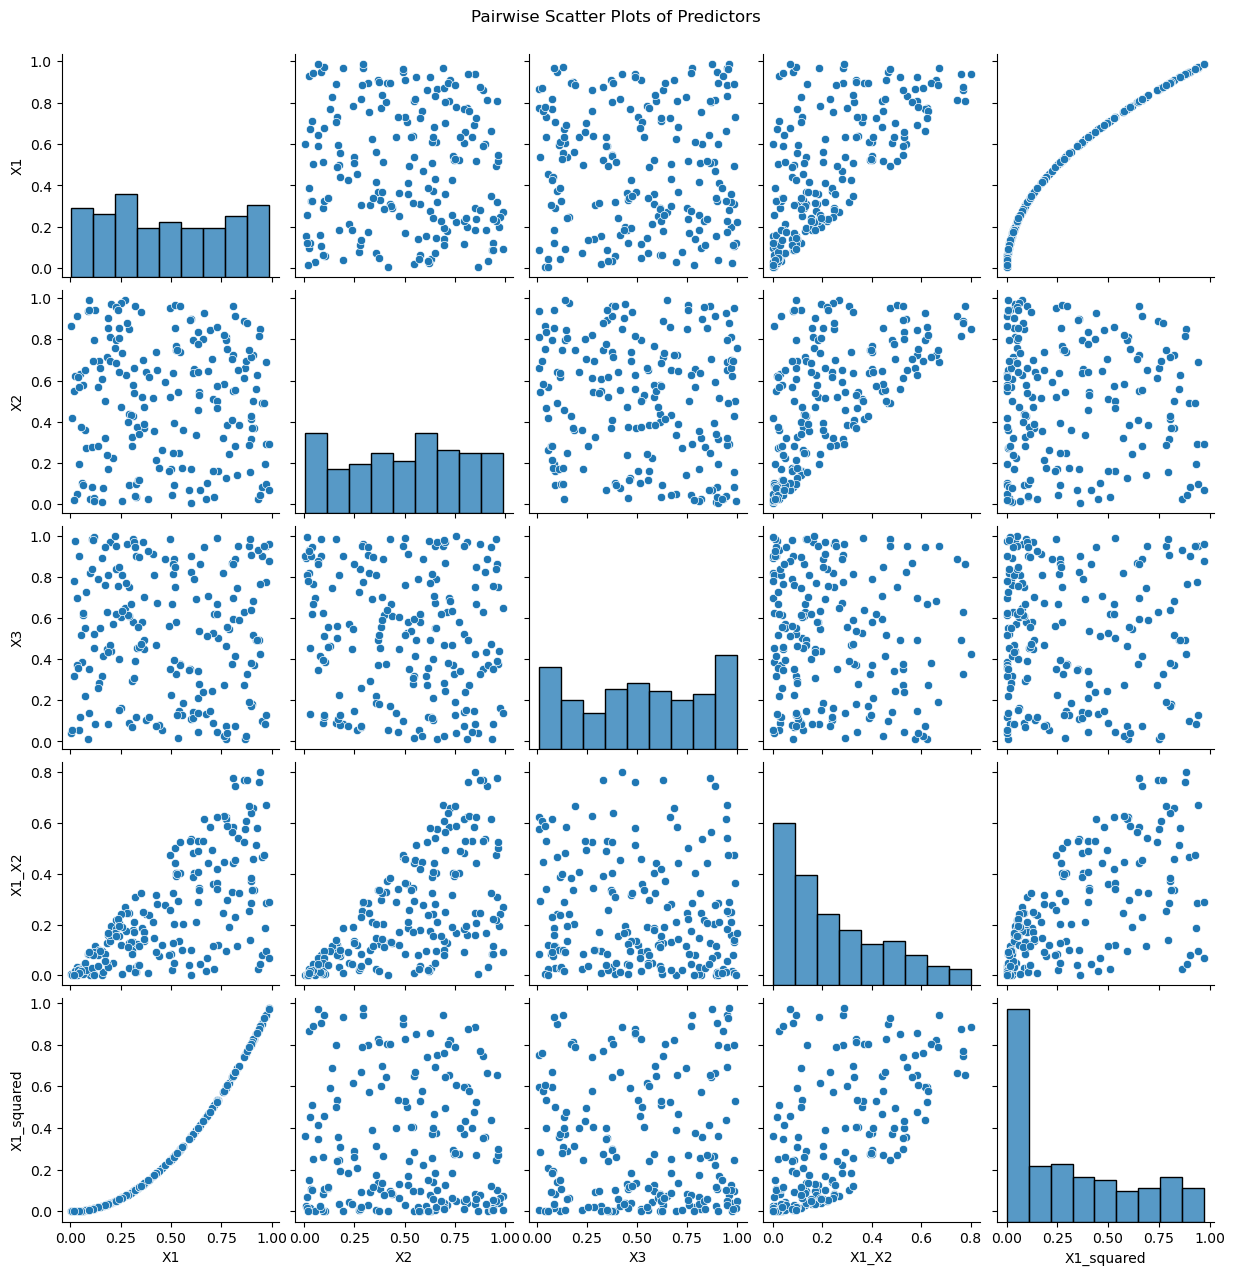

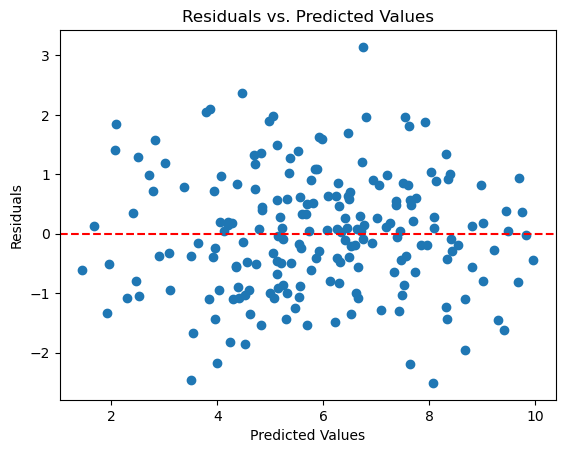

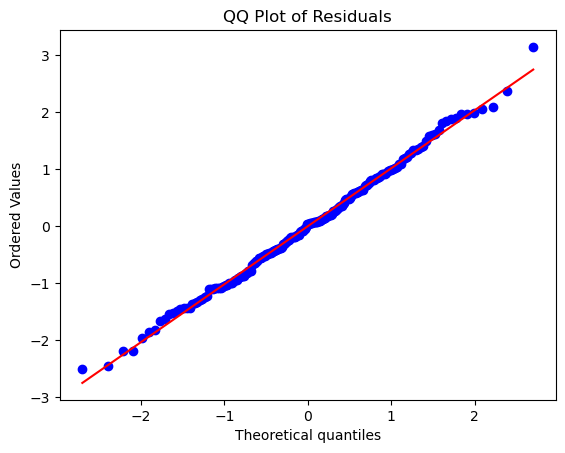

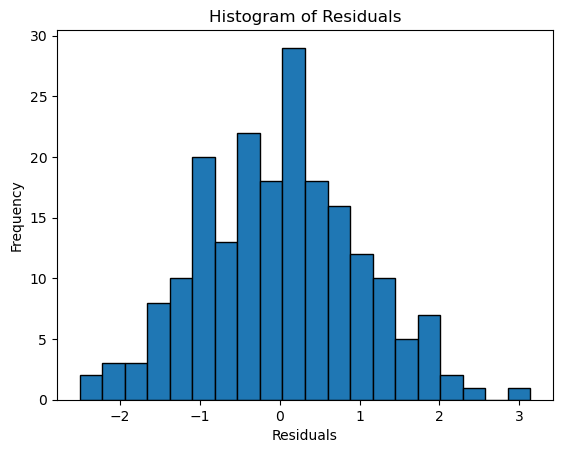

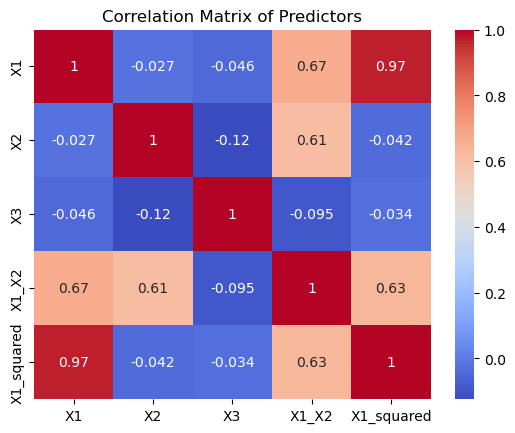

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Create a more complex dummy dataset
np.random.seed(42)

# Number of samples
n = 200

# Generate predictors X1, X2, and X3
X1 = np.random.rand(n)
X2 = np.random.rand(n)
X3 = np.random.rand(n)

# Generate interaction term (X1 * X2)
X1_X2_interaction = X1 * X2

# Generate non-linear term (X1^2)
X1_squared = X1**2

# Combine predictors into a DataFrame
X_df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X1_X2': X1_X2_interaction, 'X1_squared': X1_squared})

# Create a complex relationship for the response variable
y = 5 + 2 * X1 + 3 * X2 - 4 * X3 + 1.5 * X1_X2_interaction + 0.7 * X1_squared + np.random.normal(0, 1, n)  # Add noise

# Add a constant term (intercept) for regression
X_df = sm.add_constant(X_df)

# Fit the linear regression model
model = sm.OLS(y, X_df).fit()

# Get the residuals and predicted values
residuals = model.resid
predicted = model.fittedvalues

# 1. Scatter Plot of Predictor vs. Response Variable
sns.pairplot(X_df.drop('const', axis=1))  # Pairwise scatter plots of the predictors
plt.suptitle("Pairwise Scatter Plots of Predictors", y=1.02)
plt.show()

# 2. Residuals vs. Predicted Values Plot
plt.scatter(predicted, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# 3. QQ Plot of Residuals
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

# 4. Histogram of Residuals
plt.hist(residuals, bins=20, edgecolor='k')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 5. Correlation Matrix (Check for multicollinearity)
correlation_matrix = X_df.drop('const', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Predictors")
plt.show()


In [5]:
import statsmodels.api as sm
import statsmodels.stats.api as sms

# Perform Breusch-Pagan test
bp_test = sms.het_breuschpagan(residuals, X_df)
bp_test_stat, bp_test_p_value, _, _ = bp_test

# If p-value is small (typically < 0.05), it suggests heteroscedasticity.
print("Breusch-Pagan Test P-Value:", bp_test_p_value)


Breusch-Pagan Test P-Value: 0.8103475555629392


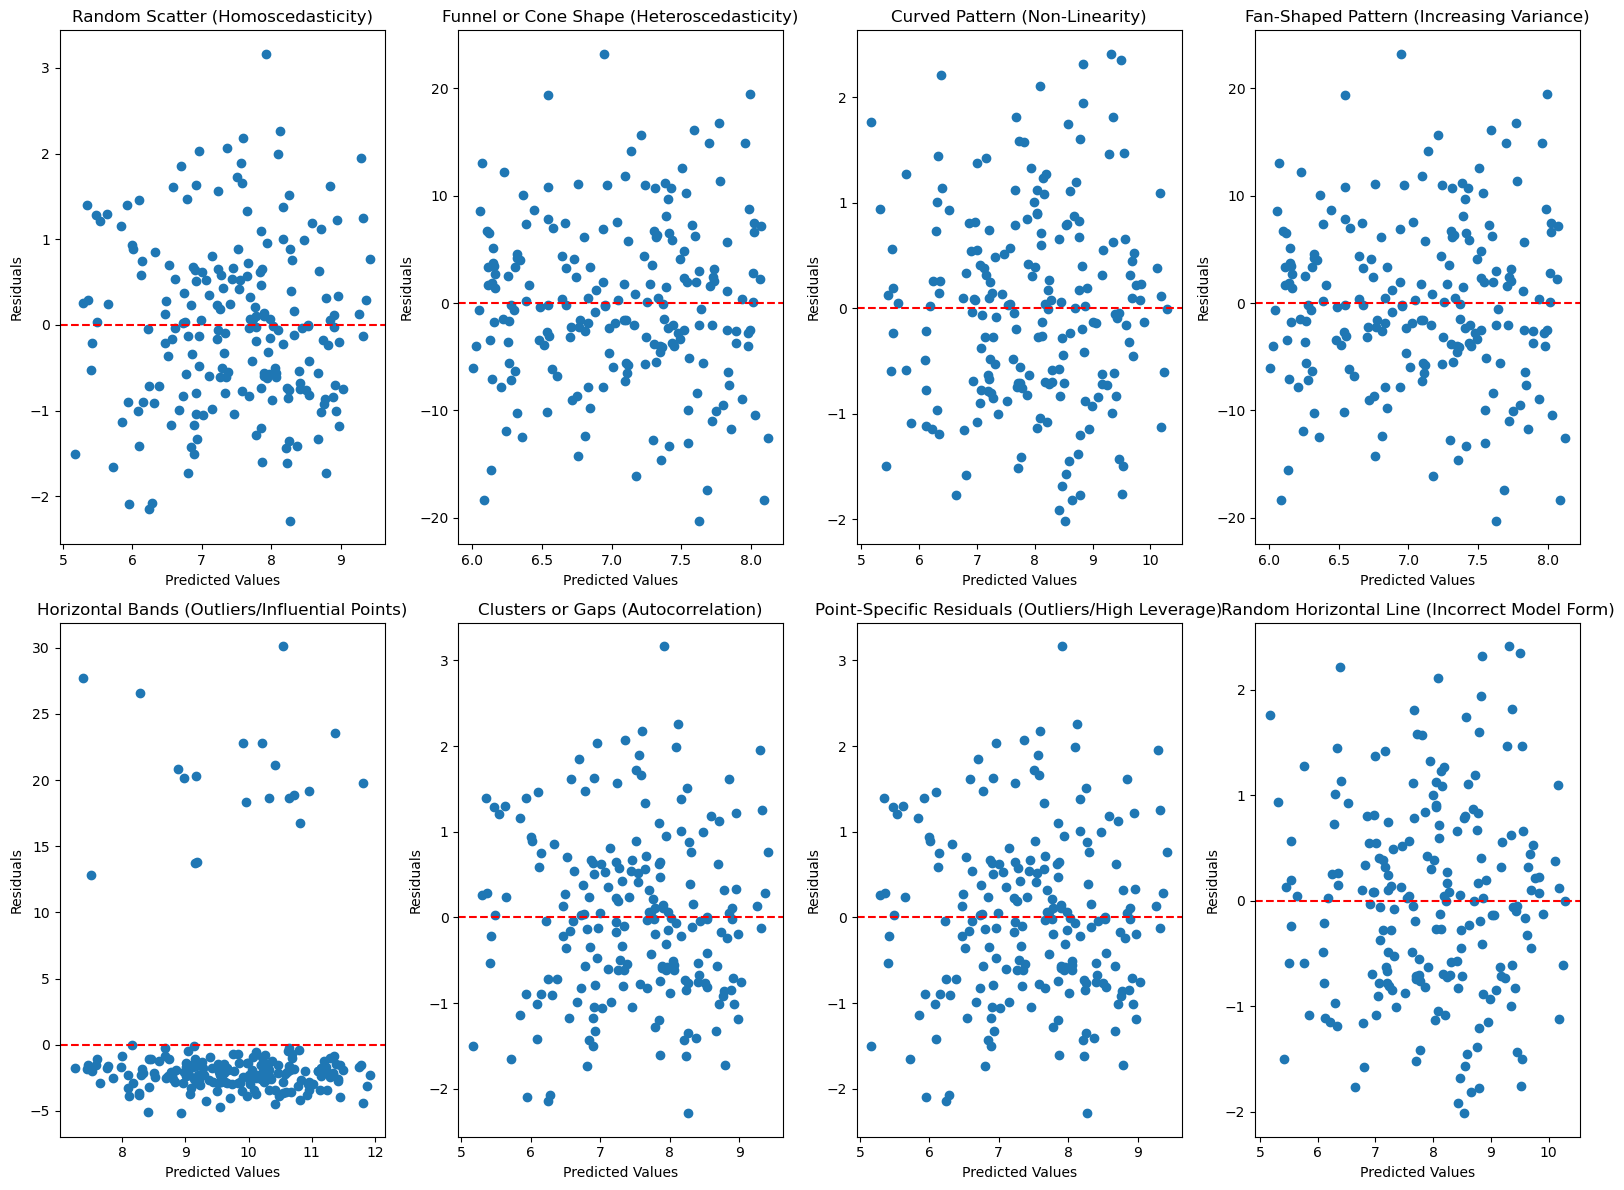

In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n = 200

# Generate predictors X1 and X2
X1 = np.random.rand(n)
X2 = np.random.rand(n)

# Create a DataFrame for predictors
X_df = pd.DataFrame({'X1': X1, 'X2': X2})

# Add a constant term (intercept) for the regression model
X_df = sm.add_constant(X_df)

# Create a response variable y with homoscedastic residuals
y_homo = 5 + 2 * X1 + 3 * X2 + np.random.normal(0, 1, n)  # Random noise with constant variance

# Fit the model for homoscedastic residuals
model_homo = sm.OLS(y_homo, X_df).fit()

# Get residuals and predicted values for homoscedastic case
residuals_homo = model_homo.resid
predicted_homo = model_homo.fittedvalues

# **Now for the Heteroscedastic Case (Increasing Residual Variance)**:
# Create a response variable y with heteroscedastic residuals
# Scale the noise variance based on predicted values to make it heteroscedastic
noise_variance = 1 + predicted_homo**2  # Variance increases with predicted value (quadratic scaling)

# Generate heteroscedastic errors by scaling the standard deviation of the residuals
y_hetero = 5 + 2 * X1 + 3 * X2 + np.random.normal(0, np.sqrt(noise_variance))

# Fit the model for heteroscedastic residuals
model_hetero = sm.OLS(y_hetero, X_df).fit()

# Get residuals and predicted values for heteroscedastic case
residuals_hetero = model_hetero.resid
predicted_hetero = model_hetero.fittedvalues

# **Curved Pattern (Non-Linearity)**:
# Create a non-linear response variable for curved pattern
y_nonlinear = 5 + 2 * X1 + 3 * X2 + (X1 ** 2) + np.random.normal(0, 1, n)

# Fit the model for non-linear residuals
model_nonlinear = sm.OLS(y_nonlinear, X_df).fit()

# Get residuals and predicted values for non-linear case
residuals_nonlinear = model_nonlinear.resid
predicted_nonlinear = model_nonlinear.fittedvalues

# **Horizontal Bands (Outliers/Influential Points)**:
# Add outliers to create horizontal bands
y_outliers = 5 + 2 * X1 + 3 * X2 + np.random.normal(0, 1, n)
y_outliers[::10] += np.random.normal(20, 5, size=20)  # Add outliers to every 10th point

# Fit the model for outliers
model_outliers = sm.OLS(y_outliers, X_df).fit()

# Get residuals and predicted values for outliers case
residuals_outliers = model_outliers.resid
predicted_outliers = model_outliers.fittedvalues

# **Plotting all the patterns**

plt.figure(figsize=(16, 12))

# Plot 1: Random Scatter (No Pattern)
plt.subplot(2, 4, 1)
plt.scatter(predicted_homo, residuals_homo)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Random Scatter (Homoscedasticity)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

# Plot 2: Funnel or Cone Shape (Heteroscedasticity)
plt.subplot(2, 4, 2)
plt.scatter(predicted_hetero, residuals_hetero)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Funnel or Cone Shape (Heteroscedasticity)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

# Plot 3: Curved Pattern (Non-Linearity)
plt.subplot(2, 4, 3)
plt.scatter(predicted_nonlinear, residuals_nonlinear)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Curved Pattern (Non-Linearity)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

# Plot 4: Fan-Shaped Pattern (Increasing Variance)
plt.subplot(2, 4, 4)
plt.scatter(predicted_hetero, residuals_hetero)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Fan-Shaped Pattern (Increasing Variance)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

# Plot 5: Horizontal Bands (Outliers/Influential Points)
plt.subplot(2, 4, 5)
plt.scatter(predicted_outliers, residuals_outliers)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Horizontal Bands (Outliers/Influential Points)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

# Plot 6: Clusters or Gaps (Autocorrelation) - Simulating autocorrelation
plt.subplot(2, 4, 6)
plt.scatter(predicted_homo, residuals_homo)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Clusters or Gaps (Autocorrelation)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

# Plot 7: Point-Specific Residuals (Outliers/High Leverage)
plt.subplot(2, 4, 7)
plt.scatter(predicted_homo, residuals_homo)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Point-Specific Residuals (Outliers/High Leverage)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

# Plot 8: Random Horizontal Line (Incorrect Model Form)
plt.subplot(2, 4, 8)
plt.scatter(predicted_nonlinear, residuals_nonlinear)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Random Horizontal Line (Incorrect Model Form)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()
